# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing UCB

In [4]:
import math
N=10000
d=10
ads_selected=[]
number_of_selections=[0]*d
sums_of_rewards=[0]*d
total_reward=0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if number_of_selections[i]>0:
            average_reward=sums_of_rewards[i]/number_of_selections[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    number_of_selections[ad]+=1
    reward=dataset.values[n,ad]
    sums_of_rewards[ad]+=reward
    total_reward+=reward

## Visualising the results

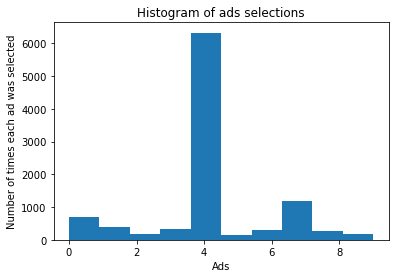

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [6]:
N=10000
d=10
ads_selected=[]
no_of_selections=[0]*d
sum_of_rewards=[0]*d
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if no_of_selections[i]>0:
            average_reward=sum_of_rewards[i]/no_of_selections[i]
            delta_i=math.sqrt(1.5*math.log(n+1)/no_of_selections[i])
            if i==4:
                print(delta_i)
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    no_of_selections[ad]+=1
    sum_of_rewards[ad]+=dataset.values[n,ad]

1.6394020872995383
1.7084686779636815
1.7661150337732119
1.815443985917585
1.8584610944249194
1.8965344471423544
1.9306371939548872
1.9614851608391803
1.989619560223232
2.0154590796275955
1.442026886600883
1.4577071063976337
1.4723378750891805
1.4860448291942037
1.498932688670673
1.5110896162347776
1.5225905030633604
1.5334994822127792
1.5438718770548803
1.5537557300461198
1.5631930154386284
1.2837127533066595
1.2907758345613702
1.2975545903711478
1.3040700482838634
1.310341025169621
1.3163844238670797
1.3222154819594423
1.3278479816259392
1.3332944276283114
1.3385661990458504
1.343673679254793
1.348626367776929
1.1721073403484075
1.1761504135495282
1.1800803044768247
1.1839029127661875
1.187623696035527
1.1912477125767535
1.1947796590434028
1.1982239038190694
1.2015845166451138
1.2048652949979344
1.2080697876329352
1.2112013156513473
1.2142629913950362
1.217257735431587
1.2201882918558289
1.0939356534866584
1.000916228416803
0.9287493538627035
0.8706733674110965
0.8226423899591709
0.8

0.14898985500622078
0.14884589688178942
0.1487023772013568
0.14855929374379573
0.14841664430367174
0.14827442669110105
0.14813263873160992
0.14799127826599578
0.14785034315018966
0.14770983125512036
0.14756974046657984
0.1474300686850904
0.14729081382577303
0.14715197381821726
0.14701354660635263
0.14687553014832125
0.1467379224163519
0.1466007213966355
0.1464639250892019
0.14632753150779793
0.14619153867976692
0.14605594464592925
0.14592074746046446
0.1457859451907945
0.1456515359174681
0.1455175177340466
0.14538388874699082
0.14525064707554922
0.1451177908516472
0.14498531821977753
0.1448532273368921
0.1447215163722945
0.14459018350753414
0.14445922693630106
0.14432864486432218
0.1441984355092584
0.14406859710060285
0.1439391278795803
0.14381002609904742
0.1436812900233942
0.14355291792844643
0.14342490810136904
0.14343136954735958
0.14330370969771414
0.14331015601379363
0.14331659779502007
0.14332303504759183
0.14332946777769484
0.14333589599150248
0.14334231969517555
0.143348738894

0.09972043739490509
0.09972258689622834
0.09972473561245719
0.09972688354415
0.09972903069186462
0.09973117705615821
0.0997333226375874
0.09973546743670826
0.09969618357629556
0.09969832592223235
0.0996590894128208
0.09961990182373595
0.09962204005517122
0.09962417750859155
0.09962631418454822
0.09958717042568414
0.09958930466370665
0.09959143812623725
0.09959357081382465
0.09959570272701701
0.09959783386636187
0.09959996423240625
0.09960209382569654
0.09960422264677861
0.09960635069619773
0.09960847797449858
0.0996106044822253
0.09961273021992147
0.09961485518813006
0.09961697938739347
0.09961910281825359
0.0996212254812517
0.0996233473769285
0.09962546850582418
0.09962758886847829
0.09962970846542989
0.09963182729721742
0.09959269761044201
0.09959481403696596
0.099596929700254
0.09955784540793113
0.09955995867184034
0.09956207117443498
0.09952303218792963
0.09948404167898776
0.09944509954713956
0.09940620569220604
0.09936736001429805
0.09932856241381517
0.09928981279144466
0.09925111

0.0785981160624534
0.07857985887476761
0.07856161516976427
0.07854338493078457
0.07852516814119838
0.07850696478440437
0.07848877484382982
0.07847059830293066
0.07845243514519126
0.07843428535412457
0.07841614891327185
0.07839802580620275
0.07837991601651519
0.07836181952783529
0.07834373632381736
0.07832566638814376
0.07830760970452491
0.0782895662566992
0.07827153602843287
0.07825351900352008
0.07823551516578275
0.07821752449907052
0.07819954698726066
0.07818158261425807
0.0781636313639952
0.078145693220432
0.07812776816755573
0.07810985618938117
0.07809195726995026
0.07807407139333224
0.07805619854362354
0.07803833870494767
0.07802049186145527
0.07800265799732388
0.07798483709675808
0.07796702914398927
0.0779492341232757
0.07793145201890239
0.07791368281518106
0.07789592649645008
0.0778781830470744
0.07786045245144552
0.07784273469398141
0.07782502975912646
0.07780733763135142
0.07778965829515333
0.0777719917350555
0.07775433793560742
0.0777366968813847
0.07771906855698903
0.0777014

0.06441754051799302
0.06441818215912681
0.06440854216943746
0.0644091834739974
0.06440982466153725
0.06441046573209865
0.06440082968419224
0.06440147041867408
0.064402111036321
0.06439247914672126
0.06438285184997686
0.06437322914241529
0.06436361102036817
0.06435399748017119
0.06434438851816417
0.06433478413069102
0.06432518431409974
0.06431558906474237
0.0643059983789751
0.06429641225315814
0.06428683068365576
0.0642772536668363
0.06426768119907217
0.0642581132767398
0.06424854989621967
0.06423899105389631
0.06422943674615826
0.0642198869693981
0.06421034172001237
0.06420080099440173
0.06419126478897076
0.06418173310012806
0.0641823685985006
0.06418300398149339
0.0641734763737374
0.0641741114255229
0.06416458811169129
0.06416522283255356
0.06415570380937567
0.06415633819959839
0.06414682346380701
0.06414745752367355
0.0641480914686002
0.0641385808017984
0.06412907463099252
0.06412970803099541
0.06412020613779547
0.06412083920829026
0.06412147216414317
0.06411197433071175
0.0641126069

0.0592233578780543
0.059216021240708586
0.05920868749612063
0.05920135664237839
0.05919402867757161
0.059186703599791786
0.059179381407132185
0.05917206209768783
0.0591647456695555
0.05915743212083377
0.05915012144962292
0.059142813654025024
0.05913550873214389
0.05912820668208507
0.05912090750195588
0.059113611189865384
0.05910631774392438
0.05909902716224539
0.05909173944294272
0.05908445458413239
0.059077172583932136
0.059069893440461464
0.0590626171518416
0.05905534371619548
0.059048073131647796
0.059040805396324954
0.059033540508355076
0.059026278465868005
0.05902674578653711
0.05902721303787687
0.05902768021990739
0.059020420629646485
0.05902088761198335
0.059021354525080186
0.05901409751609811
0.05901456422969088
0.05900730993068024
0.059007776444909205
0.05900824289001637
0.05900870926602172
0.05900917557294525
0.059001923591977125
0.05899467444778707
0.05898742813851478
0.05898018466230169
0.05897294401729091
0.05896570620162727
0.05895847121345729
0.05895123905092922
0.058944

0.05161525122109694
0.0516105240500821
0.051605798260315354
0.0516010738511188
0.051596350821815046
0.05159162917172714
0.051586908900178606
0.051582190006493424
0.051577472489996036
0.051572756350011364
0.051568041585864796
0.051563328196882155
0.051558616182389744
0.05155390554171435
0.051549196274183175
0.05154448837912392
0.05153978185586474
0.05153507670373424
0.05153037292206149
0.05152567051017603
0.05152096946740785
0.05151626979308739
0.05151157148654558
0.05150687454711378
0.051502178974123805
0.05149748476690795
0.051492791924798956
0.05148810044713002
0.051483410333234794
0.05147872158244739
0.051474034194102375
0.051469348167534776
0.05146466350208005
0.05145998019707416
0.05145529825185346
0.051450617665754796
0.051445938438115464
0.05144126056827321
0.051436584055566226
0.05143190889933316
0.05142723509891312
0.05142256265364565
0.05141789156287075
0.05141322182592889
0.05140855344216095
0.051403886410908296
0.05139922073151273
0.05139455640331649
0.05138989342566229
0.0

0.0474121265970351
0.04740852468238766
0.04740492364160972
0.047401323474344816
0.047397724180236675
0.04739412575892924
0.04739052821006663
0.04739079087536363
0.047387194148986074
0.04738745673647133
0.04738386083226308
0.04738412334197465
0.0473805282596201
0.04737693404833612
0.04737334070776786
0.047369748237560634
0.047366156637359984
0.04736256590681164
0.047358976045561565
0.04735538705325589
0.04735179892954095
0.047348211674063306
0.04734462528646969
0.047341039766407064
0.04733745511352259
0.047333871327463584
0.04733028840787764
0.04732670635441249
0.04732312516671609
0.0473195448444366
0.04731596538722238
0.047312386794721974
0.04730880906658415
0.047305232202457866
0.047301656201992275
0.047298081064836725
0.04729450679064079
0.047290933379054205
0.04728736082972695
0.04728378914230916
0.047280218316451184
0.04727664835180359
0.047273079248017116
0.04726951100474273
0.047265943621631556
0.04726237709833496
0.04725881143450447
0.04725524662979184
0.047251682683849
0.047248